<a href="https://colab.research.google.com/github/hetpatel007/GIS-1/blob/main/ps_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Resaerch Intesrest**


In this Project ,
I am working to map to correlation between literacy rate and unemployment rate accross states in India

## **Libraries**

In [ ]:
import os, zipfile #basics
import pandas as pd #data management
import matplotlib.pyplot as plt #vis

import geopandas as gpd #gis/maps

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import files #to download from colab onto hd

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

In [ ]:
!pip install mapclassify
import mapclassify #need for thematic map classification

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 kB 1.3 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## mapping your area of interest

*   In the code we found the zip file ,unzipped it and found the shape file of india ,after which we plot it.

In [ ]:
! wget -q -O GIS_INDIA_MAP.zip https://drive.google.com/uc?id=1BHlY3nu1CY1eg0ULpvQDbYobmXMQaB9N&export=download
zip_ref = zipfile.ZipFile('GIS_INDIA_MAP.zip', 'r'); zip_ref.extractall(); zip_ref.close()

In [ ]:
Ind = gpd.read_file('India States/Indian_states.shp')

<Axes: >

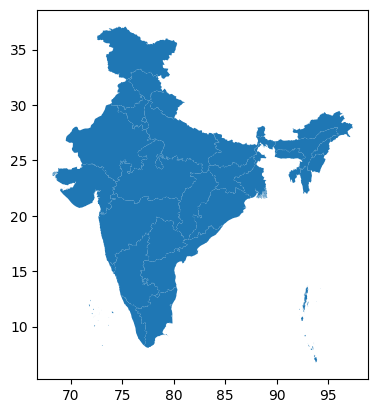

In [ ]:
Ind.plot()

# **Data Types and columns in the shapefile**

In [ ]:
Ind.dtypes

st_nm         object
geometry    geometry
dtype: object

In [ ]:
import pandas as pd
# Rename columns using the rename() method
Ind = Ind.rename(columns={'st_nm': 'State'})

In [ ]:
Ind.dtypes

State         object
geometry    geometry
dtype: object

In [ ]:
Ind['State'].count()

36

## Unemployment in India
Map 1

In [ ]:
! wget -q -O up_df.csv https://drive.google.com/uc?id=1o3dQsYfZzpAA0-gBOW3b32Evh3vjFP5d&export=download


In [ ]:
df_unemp = pd.read_csv("up_df.csv")

In [ ]:
df_unemp.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [ ]:
df_unemp.dtypes

Region                                       object
 Date                                        object
 Frequency                                   object
 Estimated Unemployment Rate (%)            float64
 Estimated Employed                         float64
 Estimated Labour Participation Rate (%)    float64
Area                                         object
dtype: object

In [ ]:
df_unemp=df_unemp.rename(columns={'Region':'State'})

In [ ]:
df_unemp['State'].nunique()

28

In [ ]:
#merge
#njC1 = pd.merge(njC, zil1, on='COUNTY',how='outer',indicator=True)
df_1 = pd.merge(Ind, df_unemp, on='State',how='outer',indicator=True)

In [ ]:
df_2 = pd.merge(Ind, df_unemp, on='State',how='inner',indicator=False)

In [ ]:
df_1.dtypes

State                                         object
geometry                                    geometry
 Date                                         object
 Frequency                                    object
 Estimated Unemployment Rate (%)             float64
 Estimated Employed                          float64
 Estimated Labour Participation Rate (%)     float64
Area                                          object
_merge                                      category
dtype: object

## Took relevant columns

In [ ]:
df_1 = df_1[['State',' Date',' Estimated Unemployment Rate (%)','Area','_merge','geometry']]

In [ ]:
df_1 = df_1.iloc[2:]

In [ ]:
df_1.shape

(775, 6)

<Axes: >

[]

[]

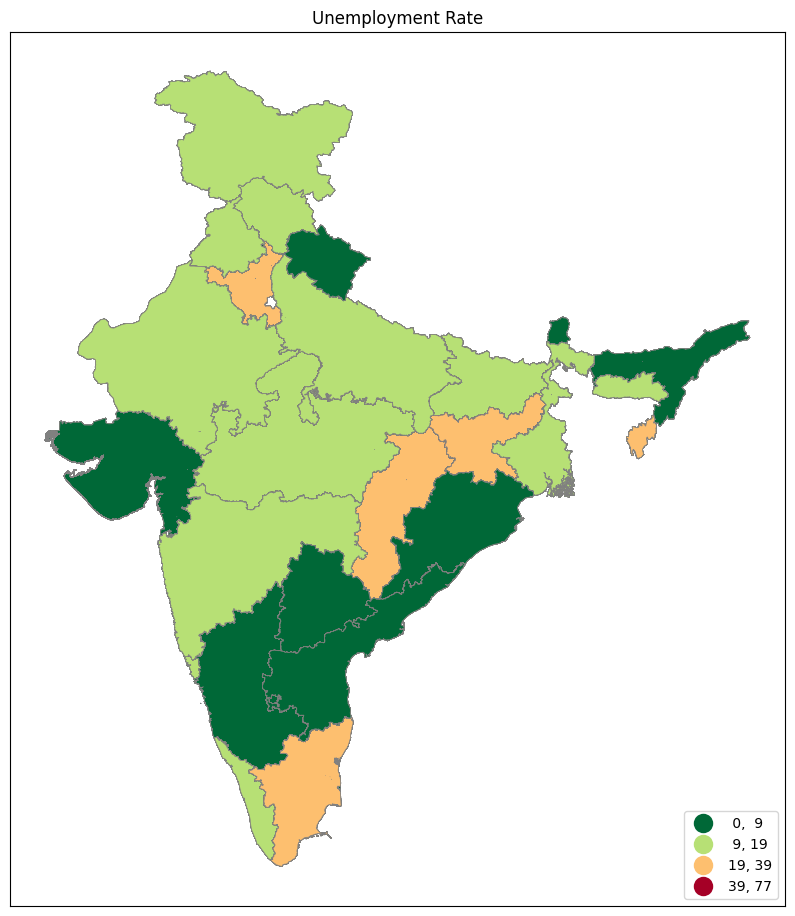

In [ ]:
fig, ax = plt.subplots(1, figsize=(10,12))
df_1.plot(ax=ax,column=' Estimated Unemployment Rate (%)',legend=True,cmap='RdYlGn_r',
          scheme='natural_breaks',k=4, edgecolor='grey',linewidth=0.5,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'lower right','markerscale':1.4})
leg1 = ax.get_legend()
ax.title.set_text("Unemployment Rate")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks

##MAP 2
Literacy rate

In [ ]:
! wget -q -O lit_df.csv "https://drive.google.com/uc?id=1o9gOvKIMbAIKk5HBHGfBPh3DY617TiEW&export=download"

In [ ]:
df_literacy = pd.read_csv("lit_df.csv")

In [ ]:
df_literacy.head()

,Category,Country/ States/ Union Territories Name,Literacy Rate (Persons) - Total - 2019,Literacy Rate (Persons) - Total - 2019.1,Literacy Rate (Persons) - Rural - 2019,Literacy Rate (Persons) - Rural - 2019.1,Literacy Rate (Persons) - Urban - 2019,Literacy Rate (Persons) - Urban - 2019.1
0,Country,INDIA,64.8,73.0,58.7,67.8,79.9,84.1
1,State,Andhra Pradesh,60.5,67.0,54.5,60.4,76.1,80.1
2,State,Arunachal Pradesh,54.3,65.4,47.8,59.9,78.3,82.9
3,State,Assam,63.3,72.2,59.7,69.3,85.3,88.5
4,State,Bihar,47.0,61.8,43.9,59.8,71.9,76.9


In [ ]:
df_literacy.dtypes

Category                                     object
Country/ States/ Union Territories Name      object
Literacy Rate (Persons) - Total - 2019      float64
Literacy Rate (Persons) - Total - 2019.1    float64
Literacy Rate (Persons) - Rural - 2019      float64
Literacy Rate (Persons) - Rural - 2019.1    float64
Literacy Rate (Persons) - Urban - 2019      float64
Literacy Rate (Persons) - Urban - 2019.1    float64
dtype: object

In [ ]:
df_literacy.rename(columns= {'Country/ States/ Union Territories Name' : 'State','Literacy Rate (Persons) - Total - 2019' : 'Literacy_rate'}, inplace=True)
df_literacy.head(10)

,Category,State,Literacy_rate,Literacy Rate (Persons) - Total - 2019.1,Literacy Rate (Persons) - Rural - 2019,Literacy Rate (Persons) - Rural - 2019.1,Literacy Rate (Persons) - Urban - 2019,Literacy Rate (Persons) - Urban - 2019.1
0,Country,INDIA,64.8,73.0,58.7,67.8,79.9,84.1
1,State,Andhra Pradesh,60.5,67.0,54.5,60.4,76.1,80.1
2,State,Arunachal Pradesh,54.3,65.4,47.8,59.9,78.3,82.9
3,State,Assam,63.3,72.2,59.7,69.3,85.3,88.5
4,State,Bihar,47.0,61.8,43.9,59.8,71.9,76.9
5,State,Chhattisgarh,64.7,70.3,60.5,66.0,80.6,84.0
6,State,Goa,82.0,88.7,79.7,86.6,84.4,90.0
7,State,Gujarat,69.1,78.0,61.3,71.7,81.8,86.3
8,State,Haryana,67.9,75.6,63.2,71.4,79.2,83.1
9,State,Himachal Pradesh,76.5,82.8,75.1,81.9,88.9,91.1


In [ ]:
df_literacy = df_literacy.drop(df_literacy.index[0])

In [ ]:
df_literacy.head(3)

,Category,State,Literacy_rate,Literacy Rate (Persons) - Total - 2019.1,Literacy Rate (Persons) - Rural - 2019,Literacy Rate (Persons) - Rural - 2019.1,Literacy Rate (Persons) - Urban - 2019,Literacy Rate (Persons) - Urban - 2019.1
1,State,Andhra Pradesh,60.5,67.0,54.5,60.4,76.1,80.1
2,State,Arunachal Pradesh,54.3,65.4,47.8,59.9,78.3,82.9
3,State,Assam,63.3,72.2,59.7,69.3,85.3,88.5


In [ ]:
Literacy_df = pd.merge(Ind,df_literacy, on='State',how='outer',indicator=True)
#print(C1.columns)

In [ ]:
Literacy_df_2 = pd.merge(Ind,df_literacy, on='State',how='inner',indicator=False)

In [ ]:
Literacy_df = Literacy_df[['State','Literacy_rate','geometry','_merge']]

In [ ]:
Literacy_df.shape

(39, 4)

<Axes: >

[]

[]

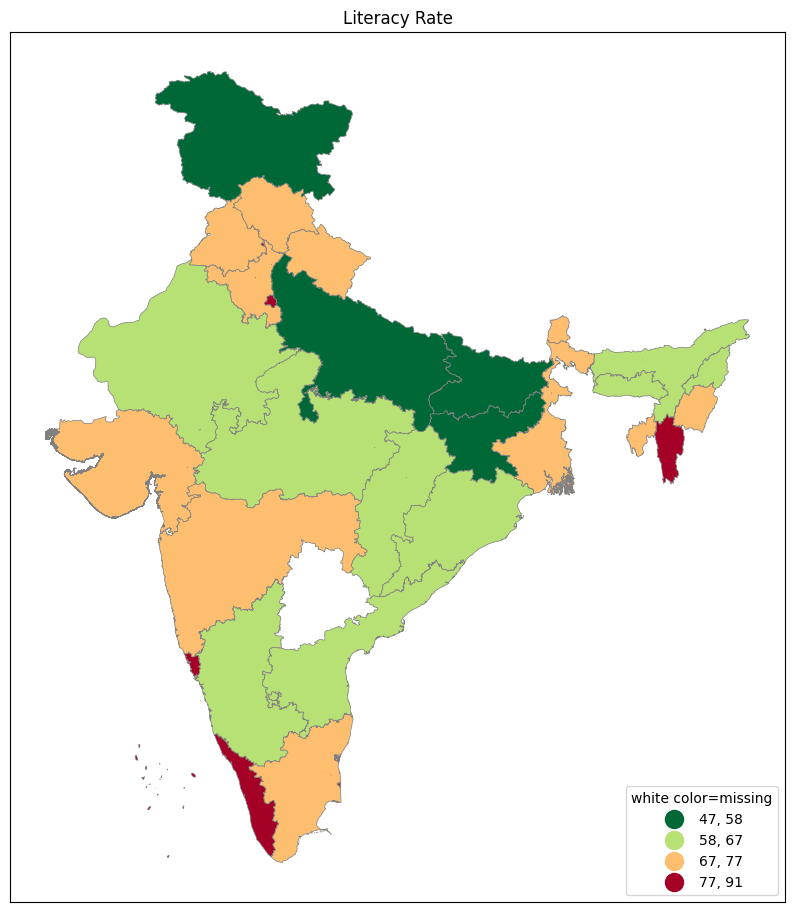

In [ ]:
fig, ax = plt.subplots(1, figsize=(10,12))
Literacy_df.plot(ax=ax,column='Literacy_rate',legend=True,cmap='RdYlGn_r',
          scheme='natural_breaks',k=4, edgecolor='grey',linewidth=0.5,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'lower right','markerscale':1.4})
leg1 = ax.get_legend()
leg1.set_title('''white color=missing''')
ax.title.set_text("Literacy Rate")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks

### Inference ###

By plotting both the maps we were able to discover correlation between literacy rate and unemployment. Majority of States with higher literacy has a lower unemployment rate.